In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [21]:
df =pd.read_csv("kyphosis_DT.csv")

In [22]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


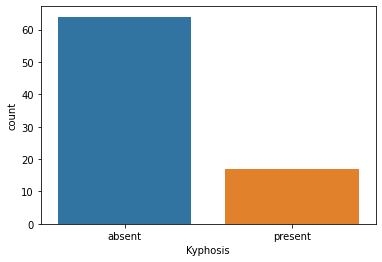

In [24]:
sns.countplot("Kyphosis",data=df);

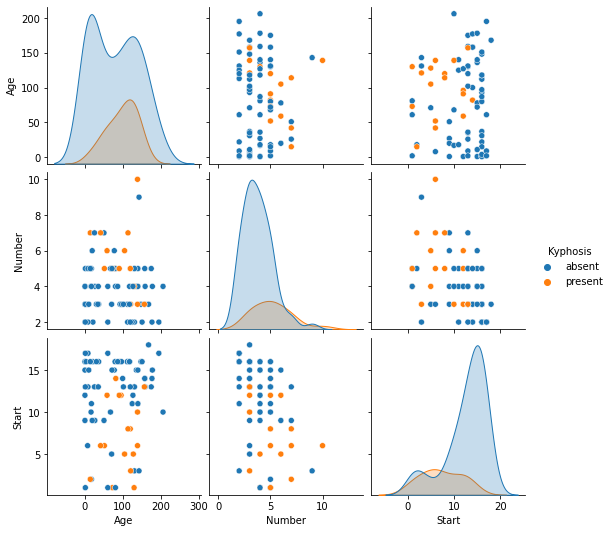

In [25]:
sns.pairplot(df,hue="Kyphosis")

In [26]:
from sklearn.model_selection import train_test_split

In [44]:
X = df.drop("Kyphosis",axis=1,inplace= False)
y= df["Kyphosis"]
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=101)

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
dtree= DecisionTreeClassifier(criterion="entropy",max_depth=16)

In [62]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=16, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [63]:
predict=dtree.predict(X_test)

In [64]:
from sklearn.metrics import confusion_matrix, classification_report

In [65]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

      absent       0.71      0.88      0.79        17
     present       0.50      0.25      0.33         8

    accuracy                           0.68        25
   macro avg       0.61      0.57      0.56        25
weighted avg       0.65      0.68      0.64        25



In [66]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

In [67]:
feature = list(df.columns[1:])
feature

['Age', 'Number', 'Start']

In [68]:
dot_data = StringIO()
export_graphviz(dtree,out_file=dot_data,feature_names=feature,filled=True)

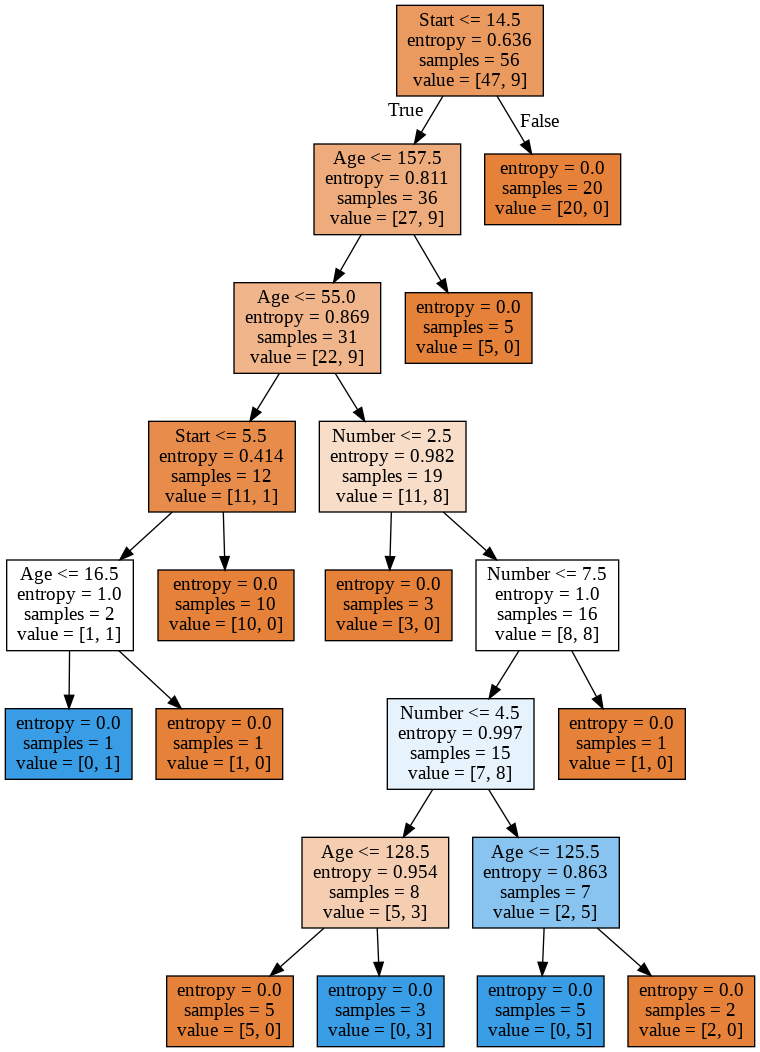

In [69]:
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())